# V-shape-transmon


In [1]:
import os
import numpy as np
import scipy.optimize as optimize

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import matplotlib as mpl

#### Invariants

In [2]:
e = 1.60217662e-19    # [Coulomb]
h = 6.62607015e-34     # [J*sec]
hbar = h / (2*np.pi)   # [J*sec]
mag_quanta = np.pi*hbar / e # [Wb]

In [3]:
# ## FONT and LAYOUT

# def set_font(filename='Forza-Book.ttf'):
#     '''
#     Takes the name of file.ttf
#     File must be in folder of
#     Python27\Lib\site-packages\matplotlib\mpl-data\fonts\ttf
#     return prop
#     wich could be use as in an example:
#     ax.set_title('This is a special font: {}'.format(fname), fontproperties=prop)
#     fontproperties = set_font('Forza-Book.ttf')
#     '''
#     ## special font from ttf
#     ###+===============================######
#     from matplotlib import font_manager as fm, rcParams

# #     str_adress_name = "C:\\Users\\cyril.mori\\Desktop\\Scripts\\Data_Processing\\Plots_Vlads_thesis\\reference_plotter\\font\\" +filename
#     str_adress_name = "D:\\Data\\==Documents==\\Fonts\\font\\" +filename
#     fpath = os.path.join(rcParams["datapath"], str_adress_name)
#     prop = fm.FontProperties(fname=fpath)
#     # fname = os.path.split(fpath)[1]
    
#     return prop


# def set_ax(ax, title, xlabel, ylabel, color_title):
#     ax.set_title(title, fontproperties=TITLEFONT, color=color_title)
#     ax.set_xlabel(xlabel, fontproperties=LABELFONT)
#     ax.set_ylabel(ylabel, fontproperties=LABELFONT)
#     for label in ax.get_xticklabels():  
#         label.set_fontproperties(TICKFONT)
#     for label in ax.get_yticklabels():  
#         label.set_fontproperties(TICKFONT)
#     return ax

# '''
# New fonts, sizes settings
# '''

# # SCALE = 0.35 ## To set in LATEX

# ################

# FONTSIZE = 24   # overall default font size
# FIGWIDTH = 16

# ###
# TITLESIZE = int(1.15*FONTSIZE)#28
# LABELSIZE = int(0.9*FONTSIZE)
# LEGENDFONTSIZE = 16
# TICKSSIZE = int(0.85*FONTSIZE) #20

# TITLEPAD = 22
# LABELPAD = 12
# ###

# ###
# FIGSIZE_DEFAULT = [FIGWIDTH, 0.618*FIGWIDTH]
# FIGSIZE_DEFAULT_PAIR = [FIGWIDTH, FIGWIDTH/2.9]
# DPI = 300
# ###


# plt.rc('font',  size   = FONTSIZE)
# plt.rc('xtick', labelsize =TICKSSIZE)
# plt.rc('ytick', labelsize =TICKSSIZE)

# FONT = set_font(filename='HelveticaNowMicro-Light.ttf')
# FONT.set_size(FONTSIZE)

# TICKFONT = FONT.copy()
# TICKFONT.set_size(TICKSSIZE)

# TITLEFONT = FONT.copy()
# TITLEFONT.set_size(TITLESIZE)

# LABELFONT = FONT.copy()
# LABELFONT.set_size(LABELSIZE)

# LEGENDFONT = FONT.copy()
# LEGENDFONT.set_size(LEGENDFONTSIZE)

# plt.rc('font', family = FONT.get_family())

# print(FONT)


In [4]:
# '''
# GLOBAL COLORS
# '''
# c_wine = "#40001b"
# c_mit = "#a31f34"
# c_old_red_A = "#550840"
# c_old_qbt  = "#EC0033"  # malinoviy
# #colors cavity and polaritons
# ## https://colorscheme.ru/#3i51Hw0w0w0w0  
# ## https://colorscheme.ru/#3i51Lw0w0w0w0


# #### REAOUT ###
# ###(ref point 219deg (RGB:0772A1))
# ## polaritons +-10 deg difference   # https://colorscheme.ru/#3r51.w0w0w0w0
# COLOR_POLAR_UP = "#009B95" 
# COLOR_POLAR_LOW = "#0D58A6"
# ## polaritons +-26 deg difference   # https://colorscheme.ru/#3r51Pw0w0w0w0
# COLOR_CAVITY = 'green' #"#00B25C"
# COLOR_ACIILLA = 'blue' #"#1435AD"


# #### QUBIT ###
# ##  https://colorscheme.ru/#5u529w0w0w0w0
# COLOR_BARE_QUBIT = c_old_qbt
# COLOR_QUBIT_G    = "#7908AA"  # purple
# COLOR_QUBIT_E    = "#FF8300"  # orange

# ## titles (Sample-A, Sample-B)
# COLOR_TEXT_EMP = c_mit


# ################################################
# '''
# STYLE AXES, AXLINES 
# '''
# COLOR_CP_CUT = 'k'
# COLOR_WT_CUT = 'grey'
# COLOR_CP_CUT_BRIGHT = "yellow" 

# AX_COLOR = 'k'
# AX_ALP = 0.7
# AX_STYLE = "-."
# AX_BRIGHT_ALP = 1.0

# LW_CP_CUT_AX =2
# LW_AX = 1
# ################################################

# ################################################
# '''
# STYLE FOR SPECTRO DATA
# '''
# ## data line curve ##
# COLOR_DATA_LINE = c_wine  ##data of spectroscopy and timedonain
# LW_DATA = 2
# ALP_DATA = 0.8
# ##

# ## fit curves color 
# COLOR_FIT_GREY = "grey"     ##for white bg, "--"style
# COLOR_FIT_GREY_2 = "darkgrey"     ##for white bg, "--"style
# LW_FIT_GREY = 2
# COLOR_FIT_BRIGHT = 'yellow' ## for white bg, "-"style
# LW_FIT_BRIGHT = 2 #example:spectroscopy of pols
# ################################################


# ################################################
# '''
# STYLE FOR PULSED DATA
# '''
# # mrk_data = '.'
# # ms_data = '5'
# # ls_data = '-'
# # lw_data = 0.5
# # alp_data = 0.7
# # ls_fit = '-'
# # lw_fit = 4
# # alp_fit = 0.4

# # edges = 1.6

# # color_A_rabi_data = 'k'
# # color_B_rabi_data = 'k'
# # color_A_rabi_fit  = COLOR_BARE_QUBIT
# # color_B_rabi_fit  = COLOR_BARE_QUBIT
# ####
# COLOR_DATA_PULSE = 'k'
# ALP_PULSE_DATA = 0.7
# LS_DATA_PULSE = "-"
# LW_DATA_PULSE = 0.5
# MS_DATA_PULSE = '5'
# MRK_DATA_PULSE = '.'
# ###
# COLOR_FIT_PULSE = '#00b2ff' #c_old_qbt #"red"
# ALP_PULSE_FIT = 0.5
# LS_FIT_PULSE = "-"
# LW_FIT_PULSE = 6
# ###
# colors = mpl.cm.cool(np.linspace(0.3, 0.7, 2))
# COLOR_HIST  = colors[0]  #'#6666a6'
# COLOR_HIST2 = colors[1]  # "#EDA082"
# ALP_HIST = 0.9
# ################################################


# ################################################
# '''
# DEFAULT COLORMAPS
# '''
# COLORMAP_AMPL = 'magma'
# COLORMAP_PHAS = 'seismic'
# COLORMAP_TWOTONE = 'Reds'
# COLORMAP_PULSED = 'bone' 
# COLORMAP_READOUT = 'viridis'
# ################################################




# ####
# def set_color_to_ax(ax, color_ax):
#     ax.spines['bottom'].set_color(color_ax)
#     ax.spines['top'].set_color(color_ax)
#     ax.spines['left'].set_color(color_ax)
#     ax.spines['right'].set_color(color_ax)
#     return ax


# DEFAULT_FRMT = 'png'
# DEFAULT_DPI = 72

#### Constants

In [5]:
fr_cavity = 7.02e9

In [6]:
###__PARAMETERS_FROM_ARRTICLE__###
C_s = 110e-15  #F (110 fF)
C_t = 59.6e-15 #F (59.6fF)
E_j_mhz = 29200
L_a = 5.32e-9  #H(5.32nH)

#### Functions to calculate parameters

In [7]:
def MHz_to_Joul(e_mhz):
    '''
    Ej/(2*pi*hbar) = fr [MHz]
    '''
    e_hz = e_mhz*1e6
    e = e_hz * (2*np.pi*hbar)
    return e

def Joul_to_MHz(e_joul):
    '''
    Ej/(2*pi*hbar) = fr [MHz]
    '''
    e_hz = e_joul / (2*np.pi*hbar)
    e_mhz = e_hz*1e-6
    return e_mhz
    
def calc_E_c(C):
    return e**2 / (2*C)

def qubit_level(E_j, E_c, m):
    E_m = -E_j + np.sqrt(8*E_c*E_j)*(m+0.5) - (E_c/12)*(6*m**2 + 6*m + 3)
    return E_m
    
def anharm_q(E_cq):
    '''
    return Hz
    '''
    return -E_cq/(2*np.pi*hbar)

def freq_qubit(E_cq, E_j):
    '''
    return Hz
    '''
    return 4*np.sqrt(E_cq*E_j)/(2*np.pi*hbar) + anharm_q(E_cq)

def freq_qubit_ef(E_cq, E_j):
    '''
    return Hz
    '''
    return 4*np.sqrt(E_cq*E_j)/(2*np.pi*hbar) + 2*anharm_q(E_cq)

def freq_qubit_gf_o2(E_cq, E_j):
    '''
    return Hz
    '''
    return 4*np.sqrt(E_cq*E_j)/(2*np.pi*hbar) + 1.5*anharm_q(E_cq)

### inverse problem ###
def get_E_c(a):
    '''
    Takes in Hz, returns in Hz
    '''
    return -a

def get_E_j(w, a):
    '''
    Takes in Hz, returns in Hz
    '''
    E_j = (w-a)**2/(-8*a)
    return E_j

#===========================#

def get_L_j(E_j):
    '''
    E_j - energy of one of the big josephson junctions
    return inductance of big josephson junctions
    '''
    L_j = (mag_quanta/(2*np.pi))**2 * (1/E_j)
    return L_j

def anharm_a(E_ca, L_j, L_a):
    '''
    return Hz
    '''
    U_a = (-E_ca/(2*np.pi*hbar) ) / ( 1 + 2*(L_j/L_a) )
    return U_a

def freq_ancil(E_j, E_ca, L_a):
    '''
    return Hz
    '''
    L_j = get_L_j( E_j )
#     w_a = (   4*np.sqrt( E_j*E_ca*( 1+2*(L_j/L_a) ) )   ) / hbar  + anharm_a(E_ca, L_j, L_a)
#     fr_a = w_a / (2*np.pi)
    fr_a = (   4*np.sqrt( E_j*E_ca*( 1+2*(L_j/L_a) ) )   ) / (2*np.pi*hbar)  + anharm_a(E_ca, L_j, L_a)
    return fr_a

def levels(E_cq, E_j):
    '''
    return energy levels for transmon
    '''
    fr_q = freq_qubit(E_cq, E_j)
    a_q = anharm_q(E_cq)
    e0 = 0
    e1 = fr_q
    e2 = 2*fr_q + a_q
    e3 = 3*fr_q + 3*a_q
    return [e0,e1,e2,e3]

def L_of_junction(E_j):
    '''
    return inductance of the junction
    '''
    fi0 = hbar**2 / (2*e)
    L = fi0**2 / E_j
    return L

#===========================#    

In [8]:
## Example of use
Ej = MHz_to_Joul(29200)
print('Ej [J] =', Ej)
print(L_of_junction(Ej))

Ej [J] = 1.9348124838e-23
6.225654168503148e-77


#### Sample as an object

In [9]:
class V_Transmon:
    '''
    Calculation of v-shape transmon
    '''
    C_s = None
    C_t = None
    E_j = None
    L_a = None

    def __init__( self, C_s, C_t, E_j_mhz, L_a ):
        ### basic leectrical parameters ###
        self.C_s = C_s
        self.C_t = C_t
        self.E_j = MHz_to_Joul( E_j_mhz )
        self.L_a = L_a
        
        self.E_j_q = 2*self.E_j
        
        ### spectroscopy parameters ###
        
        self.C_q  = 2 * self.C_s
        self.E_cq = calc_E_c( self.C_q )  ## Joul
        self.C_a  = 2*( self.C_s + 2*self.C_t )
        self.E_ca = calc_E_c( self.C_a )  ## Joul
        self.L_j  = get_L_j( self.E_j )
        
        ##qubit##
        self.fr_q = freq_qubit( self.E_cq, self.E_j )
        self.a_q  = anharm_q( self.E_cq )
        self.a_q_rel = self.a_q / self.fr_q
        
        ##ancilla##
        self.fr_a = freq_ancil( self.E_j, self.E_ca, self.L_a )
        self.U_a  = anharm_a( self.E_ca, self.L_j, self.L_a )
        self.a_a_rel = self.U_a / self.fr_a

        #===========================#
        self.g_zz = np.sqrt( self.a_q * self.U_a )
        #===========================#
        self.EjoEc = self.E_j_q / self.E_cq
        
        [e0,e1,e2,e3] = levels(self.E_cq, self.E_j)
        f02 = e2-e0
        self.Q_A_detuning = abs( self.fr_a - f02 )
        self.Q_C_detuning = abs( fr_cavity - f02 )

        
    def __str__(self):
        string = ''
        string +='Qubit parameters:'
        string +='\n fr_q[MHz]: '+str( round(1e-6* self.fr_q ,1))
        string +='\n a_q [MHz]: '+str( round(1e-6* self.a_q ,1))
        string +='\n a_q_rl[%]: '+str( round(100*  self.a_q_rel ,2))
        string +='\nAncilla parameters:'
        string +='\n fr_a[MHz]: '+str( round(1e-6* self.fr_a ,1))      
        string +='\n U_a [MHz]: '+str( round(1e-6* self.U_a ,1))
        string +='\n U_a_rl[%]: '+str( round(100*  self.a_a_rel ,2))
        string +='\nOther parameters:'
        string +='\n E_jq/E_cQ : '+str( round( self.EjoEc ,1))
        string +='\n g_zz[MHz]: '+str( round(1e-6* self.g_zz ,1) )
        string +='\n Detun_2Q_A[MHz]: '+str( round(1e-6* (self.Q_A_detuning) ,1) )
        string +='\n Detun_2Q_C[MHz]: '+str( round(1e-6* (self.Q_C_detuning) ,1) )
        string += '\n'
        return string
    
    def get_values_list(self, notif=False):
        values = [
            1e-6*self.fr_q,
            1e-6*self.a_q,
            1e-6*self.fr_a,
            1e-6*self.U_a,
            1e-6*self.g_zz,
            self.EjoEc,
            1e-6*self.Q_A_detuning,
            1e-6*self.Q_C_detuning
        ]
        if notif:
            names = ['fr_q','a_q','fr_a','U_a','g_zz','EjoEc','Q_A_detuning','Q_C_detuning']
            return [values, names]
        return values
        
#===========================##===========================#

def compare_samples(**kwargs):
    '''
    Function to compare several samples
    '''
    figsize=[15,8]
    names_list  = []
    samplenames_list = []
    y_list = []
    ######
    
    list_of_sorted_items = sorted(kwargs.items(), key=lambda x: x[0])
    for item in list_of_sorted_items:
        (key, sample) = item
        samplenames_list.append(key)
        [values, names] = sample.get_values_list(notif=True)
        y_list.append( np.abs(values) )
        names_list.append(names)

    x_list = np.arange(1, len(y_list)+1) - 0.2
        
    num_of_samples = len(kwargs)
    num_of_param = len(y_list[0])

#     fig2 = plt.figure(constrained_layout=True, figsize=figsize)
    fig2 = plt.figure(figsize=figsize)
    spec2 = gridspec.GridSpec(ncols=num_of_param, nrows=1, figure=fig2)
    
    ax=[]      
    for i in range( num_of_param ):
        ax.append( fig2.add_subplot(spec2[i]) )
        ax[i].set_title( names_list[0][i] )   
        for j in range( num_of_samples ):
            y = y_list[j]
            x = np.arange( 1, len(y)+1 ) - 0.2*j
            ax[i].bar( x[i], y[i], width = 0.15, label=samplenames_list[j] )  
        ax[i].legend( loc='lower center' )     
        
    ax[2].axhline(7200, c='k') #fr_A
    ax[4].axhline(15, c='k') #g_zz
    ax[5].axhline(200, c='k') #EjoEc
    ax[6].axhline(400, c='k') #Q_A
    ax[7].axhline(400, c='k') #Q_C
    
    ax[0].set_ylim(2000,None)
    ax[1].set_ylim(60,None)
    ax[2].set_ylim(6000,9000)
    ax[6].set_ylim(0,1000)
    ax[7].set_ylim(0,1000)

    return True

def compare_samples_my(**kwargs):
    figsize=[32,10]
    names_list  = []
    samplenames_list = []
    y_list = []
    ######
    
    list_of_sorted_items = sorted(kwargs.items(), key=lambda x: x[0])
    for item in list_of_sorted_items:
        (key, sample) = item
        samplenames_list.append(key)
        [values, names] = sample.get_values_list(notif=True)
        y_list.append( np.abs(values) )
        names_list.append(names)
        
    x_list = np.arange(1, len(y_list)+1) - 0.2
        
    num_of_samples = len(kwargs)
    num_of_param = len(y_list[0])
    plt.rcParams.update({'font.size': 22})
    fig2 = plt.figure(figsize=figsize)
    spec2 = gridspec.GridSpec(ncols=num_of_param, nrows=1, figure=fig2)
    
    ax=[]      
    num_of_param -=3
    for i in range( num_of_param ):
        ax.append( fig2.add_subplot(spec2[i]) )
        ax[i].set_title( names_list[0][i] )  
        for j in range( num_of_samples ):
#             if j == 1:
#                 color = 'b'
#             else:
#                 color = 'r'
                    
            y = y_list[j]
            x = np.arange( 1, len(y)+1 ) - 0.2*j
#             ax[i].bar( x[i], y[i], width = 0.15, label=samplenames_list[j] , color=color)  
            ax[i].bar( x[i], y[i], width = 0.15, label=samplenames_list[j])  
        ax[i].legend( loc='lower center' )     
        
    ax[2].axhline(7.200, ls='--', color='b')
    
#     COLOR_TEXT_EMP = 'k'
#     ax[0] = set_ax(ax[0], "$\omega_Q /2\pi$ [GHz]", "", "", COLOR_TEXT_EMP)
#     ax[1] = set_ax(ax[1], "$-\\alpha_Q /2\pi$ [MHz]", "", "", COLOR_TEXT_EMP)
#     ax[2] = set_ax(ax[2], "$\omega_A /2\pi$ [GHz]", "", "", COLOR_TEXT_EMP)
#     ax[3] = set_ax(ax[3], "$-U_A /2\pi$ [MHz]", "", "", COLOR_TEXT_EMP)
#     ax[4] = set_ax(ax[4], "$g_{zz} /2\pi$ [MHz]", "", "", COLOR_TEXT_EMP)
#     for i in range(5):
#         ax[i].tick_params(direction="inout", labelbottom=False, labeltop=False,
#                           labelleft=True, labelright=False, bottom=False, top=False, left=True, right=False)
    return fig2



#===========================##===========================#
def plot_spectra(sample, ylim=None, figsize=None):
    E_j = sample.E_j
    E_c = sample.E_cq

    Ua = 1e-6*sample.U_a
    fr_a = 1e-6* sample.fr_a

    fr_a01 = fr_a
    fr_a12 = fr_a + Ua
    fr_a02 = 2*fr_a + Ua
    fr_a02o2 = fr_a02/2

    [e0,e1,e2,e3] = levels(E_c, E_j)
    f01 = 1e-6*(e1-e0)
    f02 = 1e-6*(e2-e0)
    f03 = 1e-6*(e3-e0)
    f12 = 1e-6*(e2-e1)
    f13 = 1e-6*(e3-e1)
    f23 = 1e-6*(e3-e2)

    f02o2 = f02/2
    f13o2 = f13/2
    f03o3 = f03/3

    print( 'f01  ', f01 )
    print( 'f12  ', f12)
    print( 'f23  ', f23)
    print( 'f02/2', f02o2)
    print( 'f13/2', f13o2)
    print( 'f03/3', f03o3)
    print( 'a01  ', fr_a01)
    print( 'a12  ', fr_a12)
    print( 'a02/2', fr_a02o2)
    print( 'f02', f02)
    print( 'f13', f13)
    print( 'f03', f03)
    
    plt.figure(figsize=figsize)
    ### QUBIT LEVELS ###
    plt.axhline(f01, c='r', label='01')
    plt.axhline(f02, c='r', label='02')
    plt.axhline(f02o2, c='purple', label='02/2')
    plt.axhline(f03, c='r', label='03')
    plt.axhline(f03o3, c='purple', label='03/3')
    plt.axhline(f12, c='orange', label='12')
    plt.axhline(f13,   c='orange', label='13')
    plt.axhline(f13o2, c='violet', label='13/2')
    plt.axhline(f23, c='yellow', label='23')
    ### ANCILLA ###
    plt.axhline(fr_a01, c='k', label='a01')
    plt.axhline(fr_a02o2, c='navy', label='a02/2')
    plt.axhline(fr_a12, c='b', label='a12')
    plt.axhline(7200, c='k', label='Cavity')
    plt.legend()
    plt.ylim(ylim)

def show(sample, ylim=None, figsize=None):
    print( '\n')
    print( sample)
    plot_spectra(sample, ylim=ylim, figsize=figsize)
    print( '\n')

# Main 

#### Characteristics of Sample-A

[[6325.635960649707, -88.04649539154836, 7815.149780732974, -13.611220069204, 34.618206555171525, 663.2859120660225, 4748.075645174892, 5543.225425907867], ['fr_q', 'a_q', 'fr_a', 'U_a', 'g_zz', 'EjoEc', 'Q_A_detuning', 'Q_C_detuning']]


Qubit parameters:
 fr_q[MHz]: 6325.6
 a_q [MHz]: -88.0
 a_q_rl[%]: -1.39
Ancilla parameters:
 fr_a[MHz]: 7815.1
 U_a [MHz]: -13.6
 U_a_rl[%]: -0.17
Other parameters:
 E_jq/E_cQ : 663.3
 g_zz[MHz]: 34.6
 Detun_2Q_A[MHz]: 4748.1
 Detun_2Q_C[MHz]: 5543.2

f01   6325.635960649707
f12   6237.589465258159
f23   6149.542969866611
f02/2 6281.612712953934
f13/2 6193.566217562386
f03/3 6237.589465258159
a01   7815.149780732974
a12   7801.53856066377
a02/2 7808.344170698372
f02 12563.225425907867
f13 12387.132435124771
f03 18712.768395774478




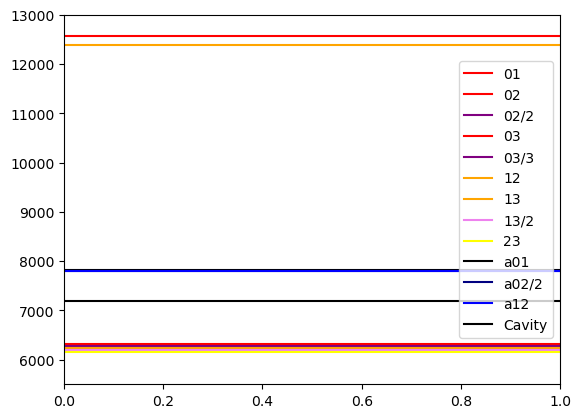

In [10]:
###__PARAMETERS_FROM_ARRTICLE__###
# https://arxiv.org/abs/1905.00271

C_s = 110e-15  #F (110 fF)
C_t = 59.6e-15 #F (59.6fF)
E_j_mhz = 29200
L_a = 5.32e-9  #H(5.32nH)

####__CALCULATION__###
remy_s = V_Transmon(C_s, C_t, E_j_mhz, L_a)

####__SHOW___###
print(remy_s.get_values_list(notif=True))
show(remy_s, ylim=[5500,13000])


#### Compare with S1,S2,S3 projects

True

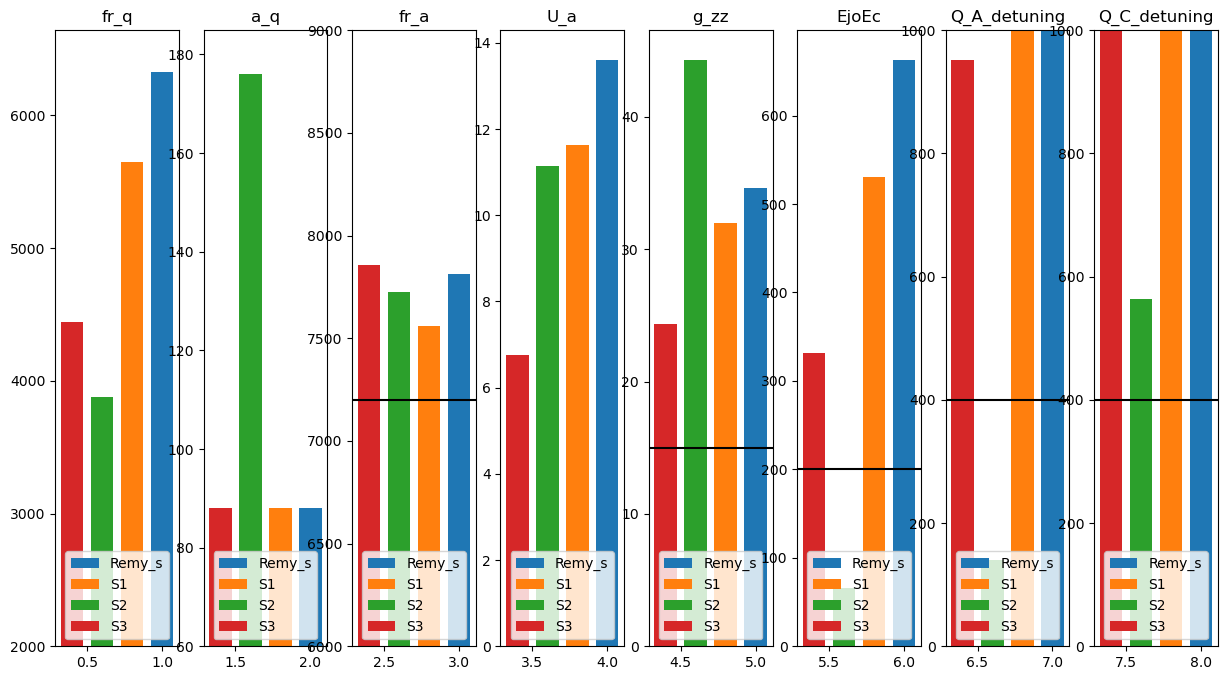

In [11]:
# ####__MANUALLY_PLAY_WITH_PARAMETERS__###
new_s1 = V_Transmon(1.0*C_s, 1.0*C_t, 0.8*E_j_mhz, 1.0*L_a)
new_s2 = V_Transmon(0.5*C_s, 0.5*C_t, 0.2*E_j_mhz, 1.6*L_a)
new_s3 = V_Transmon(1.0*C_s, 1.0*C_t, 0.5*E_j_mhz, 0.8*L_a)

compare_samples(Remy_s=remy_s, S1=new_s1, S2=new_s2, S3=new_s3)


______________

# Auto optimization

# Main variation here

#### Rank functions

Math Functions

In [12]:
def sigmoid(x, sig = 1):
    x = sig*x
    y =  1.0 / ( 1.0 + np.exp(-x) )
    return y

def well(x, xmin, xmax, sig=1):
    if xmin > xmax:
        xmin, xmax = xmax, xmin
    left_sigmoid = 1-sigmoid(x-xmin, sig=sig)
    right_sigmoid =  sigmoid(x-xmax, sig=sig)
    return left_sigmoid + right_sigmoid

def window(x, xmin, xmax, sig=1):
    return 1-well(x, xmin, xmax, sig=sig)

def gaussian(x, x0=0, width=1):
    sig = 1.0/width
    return np.exp( -(x-x0)**2 / 2*sig )


Manually setted rank functions

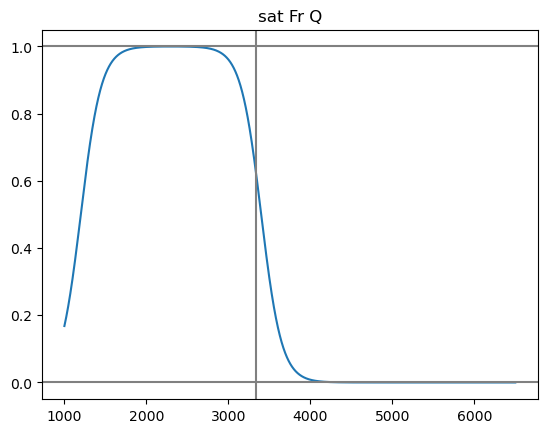

In [13]:
def satisf_frQ(X, bounty=0.0):
    limit = window(X, 1200, 3400, sig=8e-3)
    wish  = gaussian(X, x0=3000, width=2e6)
    return (1+bounty*wish)*limit

X = np.arange(1e3, 6.5e3, 1)
plt.figure()
plt.title('sat Fr Q')
plt.plot(X, satisf_frQ(X)  )

plt.axhline(0, c='grey')
plt.axhline(1, c='grey')
plt.axvline(3335, c='grey')

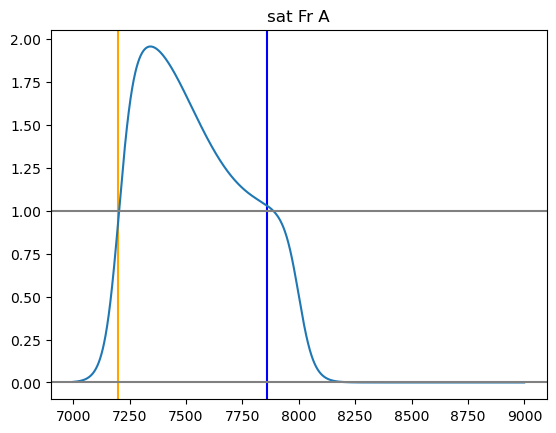

In [14]:
def satisf_frA(X, bounty=1.0):
    limit = window(X, 7200, 8000, sig=3.0e-2)
    wish  = gaussian(X, x0=7300, width=50e3)
    return (1+bounty*wish)*limit

X = np.arange(7e3, 9e3, 1)
plt.figure()
plt.axvline(7200, color='orange')
plt.axvline(7860, color='b')
plt.title('sat Fr A')
plt.plot(X, satisf_frA(X)  )

plt.axhline(0, c='grey')
plt.axhline(1, c='grey')

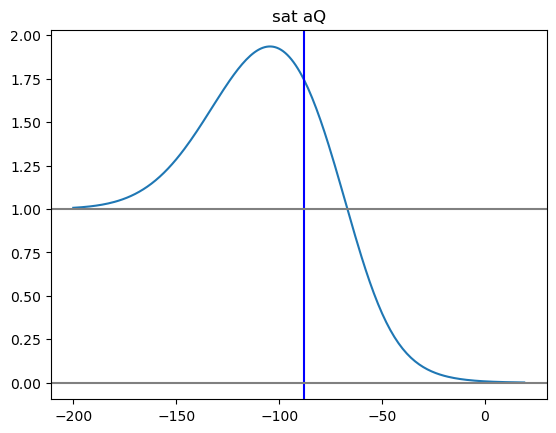

In [15]:
def satisf_aQ(X, bounty=1.0):
    limit = 1-sigmoid(X+60, sig=0.08)
    wish  = gaussian(X, x0=-100, width=1e3)
    return (1+bounty*wish)*limit

X = np.arange(-200, 20, 1)
plt.figure()
plt.title('sat aQ')
plt.plot(X, satisf_aQ(X)  )
plt.axvline(-88, color='b')

plt.axhline(0, c='grey')
plt.axhline(1, c='grey')

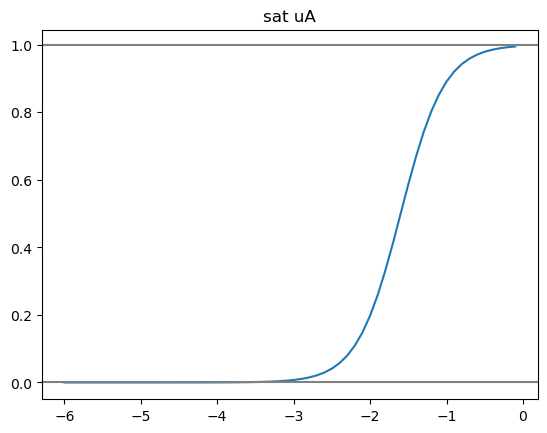

In [16]:
def satisf_uA(X, bounty=0):
    limit =  sigmoid(X+1.6, sig=3.5)
    wish  = sigmoid(X, sig=0.3)
    return (1+bounty*wish)*limit

X = np.arange(-6, 0, 0.1)
plt.figure()
plt.title('sat uA')
plt.plot(X, satisf_uA(X)  )

plt.axhline(0, c='grey')
plt.axhline(1, c='grey')

Text(0.5, 0, 'Value [MHz]')

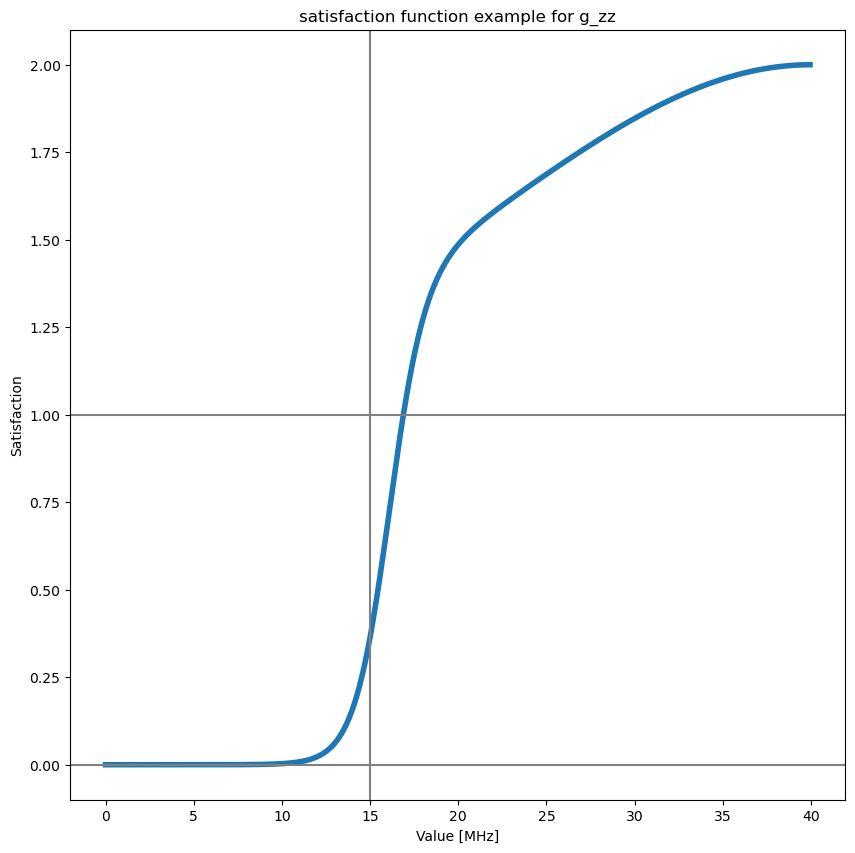

In [17]:
def satisf_gzz(X, bounty=1.0):
    limit = sigmoid(X-16, sig=1)
    wish  = gaussian(X, x0=40, width=3e2)
    return (1+bounty*wish)*limit

X = np.arange(0, 40, 0.05)
plt.figure(figsize=[10,10])
plt.title('satisfaction function example for g_zz')
plt.plot(X, satisf_gzz(X), lw=4  )
plt.axvline(15, c='grey')

plt.axhline(0, c='grey')
plt.axhline(1, c='grey')

plt.ylabel("Satisfaction")
plt.xlabel("Value [MHz]")

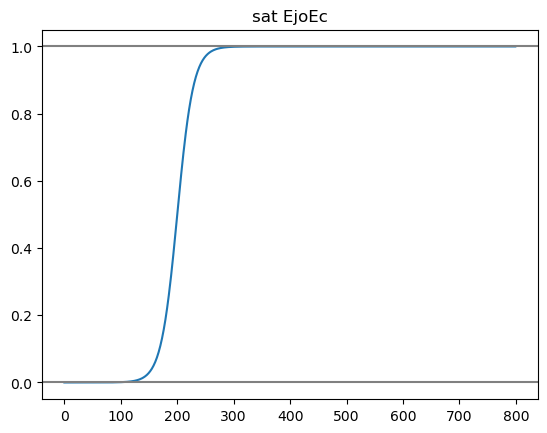

In [18]:
def satisf_EjoEc(X,bounty=0):
    limit = window(X, 200, 1200, sig=0.7e-1)
    wish  = gaussian(X, x0=400, width=1e4)
    return (1+wish*bounty)*limit

X = np.arange(0, 800, 1)
plt.figure()
plt.title('sat EjoEc')
plt.plot(X, satisf_EjoEc(X)  )

plt.axhline(0, c='grey')
plt.axhline(1, c='grey')

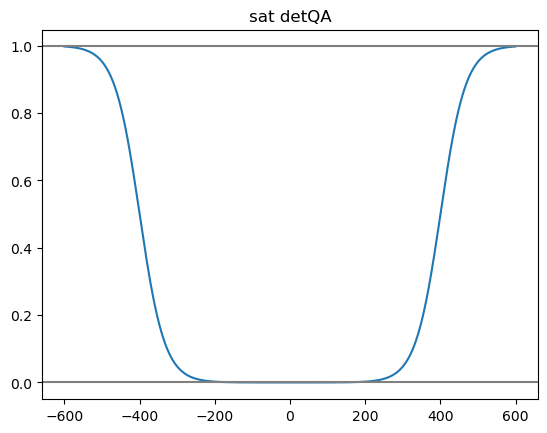

In [19]:
def satif_detQA(X, det=400, sig=3e-2):
    return well(X, xmin=-det, xmax=det, sig=sig)
X = np.arange(-600, 600, 1)
plt.figure()
plt.title('sat detQA')
plt.plot(X, satif_detQA(X)  )
plt.axhline(0, c='grey')
plt.axhline(1, c='grey')



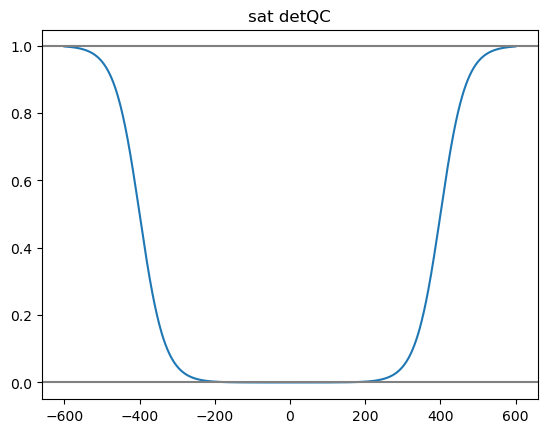

In [20]:
def satif_detQC(X, det=400, sig=3e-2):
    return well(X, xmin=-det, xmax=det, sig=sig)

X = np.arange(-600, 600, 1)
plt.figure()
plt.title('sat detQC')
plt.plot(X, satif_detQC(X)  )

plt.axhline(0, c='grey')
plt.axhline(1, c='grey')

________________

# Main function of optimization

In [21]:

def check_abcd_list(abcd_list):
    def check_arg(arg):
            if arg < 0:
                return 1.0
            if arg > 10:
                return 1.0
            return arg
    for i in range(len(abcd_list)):
        abcd_list[i] = check_arg( abcd_list[i] )
    return abcd_list
    
def satisfaction_sample(abcd_list, tell=False):
    [A, B, C, D] = check_abcd_list(abcd_list)
#     B = 2.1 #### VVVVVV #### !!!!
    
    
    given_s = V_Transmon(A*C_s, B*C_t, C*E_j_mhz, D*L_a)
    [fr_q, a_q, fr_a, U_a, g_zz, EjoEc, QAdet, QCdet] = given_s.get_values_list()
   
    sat_fr_q  = satisf_frQ(fr_q)
    sat_a_q   = satisf_aQ(a_q)
    sat_fr_a  = satisf_frA(fr_a)
    sat_uA    = satisf_uA(U_a)
    sat_gzz   = satisf_gzz(g_zz)
    sat_EjoEc = satisf_EjoEc(EjoEc)
    sat_detQA = satif_detQA(QAdet)
    sat_detQC = satif_detQC(QCdet)

    satisfaction = 1
    satisfaction *= sat_fr_q
    satisfaction *= sat_a_q
    satisfaction *= sat_fr_a
    satisfaction *= sat_uA
    satisfaction *= sat_gzz
    satisfaction *= sat_EjoEc
    satisfaction *= sat_detQA
    satisfaction *= sat_detQC
    
    if tell:
        print( 'sat_fr_q:', sat_fr_q )
        print( 'sat_a_q:',sat_a_q)
        print( 'sat_fr_a:',sat_fr_a)
        print( 'sat_uA:',sat_uA)
        print( 'sat_gzz:',sat_gzz)
        print( 'sat_EjoEc:',sat_EjoEc)
        print( 'sat_detQA:',sat_detQA)
    

    return satisfaction
    
def dissatisfaction(abcd_list, tell=False):
    sat = satisfaction_sample(abcd_list, tell=tell)
    return -sat 


# Optimisation in work

[1.087, 1.829, 0.296, 0.565]
sat_fr_q: 0.7425484244126501
sat_a_q: 1.5459547731344692
sat_fr_a: 1.9549069785107074
sat_uA: 0.14254155144150304
sat_gzz: 0.06646167724379295
sat_EjoEc: 0.723388447578659
sat_detQA: 0.999999559714448

  Satisfaction is:
 0.015273491150806128
sat_fr_q: 0.7135351273106101
sat_a_q: 1.6069429960448307
sat_fr_a: 1.198748230476856
sat_uA: 0.017293598893567273
sat_gzz: 0.3951099952193521
sat_EjoEc: 0.6100308004580938
sat_detQA: 0.9999999999743803

  Satisfaction was:
 0.0056190858294215005


True

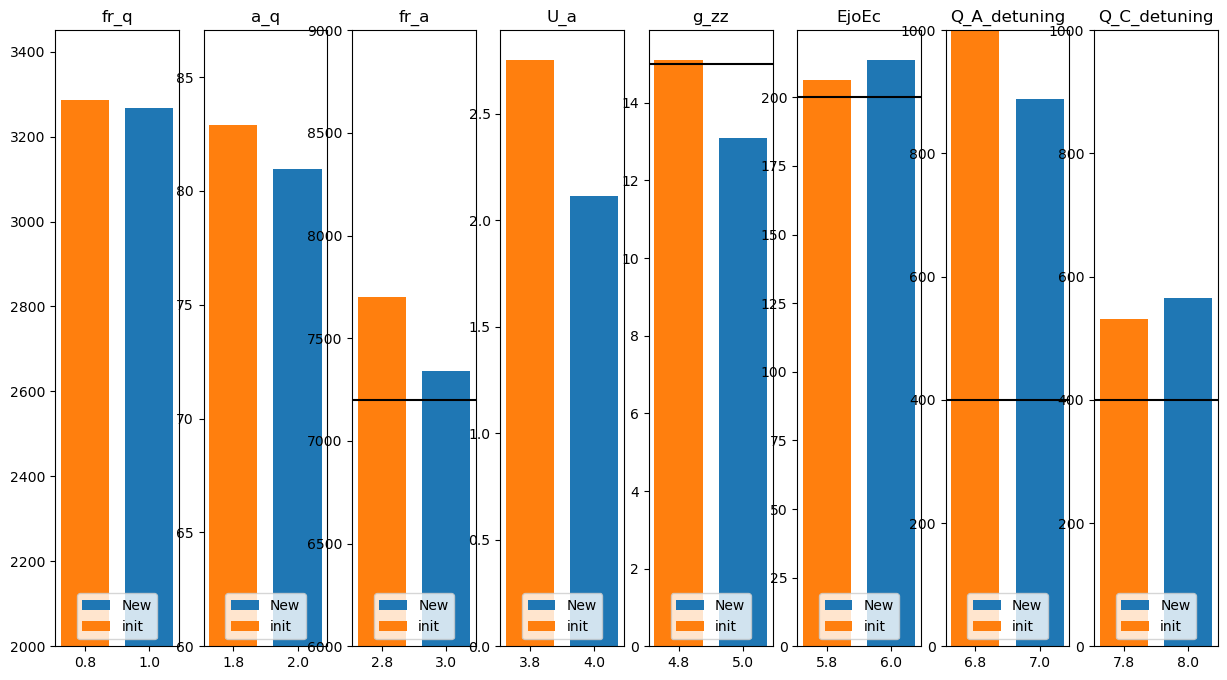

In [22]:
##################################################################

### ___INITIAL___###
# intial_ABCD = [1.15, 0.8, 0.3, 0.855] #X4O1mod1
intial_ABCD = [1.062, 1.371, 0.293, 0.622] #U5
[A,B,C,D] = intial_ABCD

##______##
init_s = V_Transmon(A*C_s, B*C_t, C*E_j_mhz, D*L_a)


### PROCESS ###
x0 = [A,B,C,D]
result = optimize.minimize(dissatisfaction, x0)

[A,B,C,D] = result.x
new_sX = V_Transmon(A*C_s, B*C_t, C*E_j_mhz, D*L_a)

##### SHOW #####

print( [ round(A,3), round(B,3), round(C,3), round(D,3) ]  )
print( '\n  Satisfaction is:\n', satisfaction_sample([A,B,C,D], tell=True) )
print( '\n  Satisfaction was:\n', satisfaction_sample(intial_ABCD, tell=True) )

compare_samples(New=new_sX, init=init_s)




Qubit parameters:
 fr_q[MHz]: 3267.6
 a_q [MHz]: -81.0
 a_q_rl[%]: -2.48
Ancilla parameters:
 fr_a[MHz]: 7342.1
 U_a [MHz]: -2.1
 U_a_rl[%]: -0.03
Other parameters:
 E_jq/E_cQ : 213.7
 g_zz[MHz]: 13.1
 Detun_2Q_A[MHz]: 887.9
 Detun_2Q_C[MHz]: 565.8

f01   3267.592902130591
f12   3186.612733979125
f23   3105.6325658276596
f02/2 3227.102818054858
f13/2 3146.1226499033924
f03/3 3186.612733979125
a01   7342.067032719981
a12   7339.954364384237
a02/2 7341.010698552109
f02 6454.205636109716
f13 6292.245299806785
f03 9559.838201937375




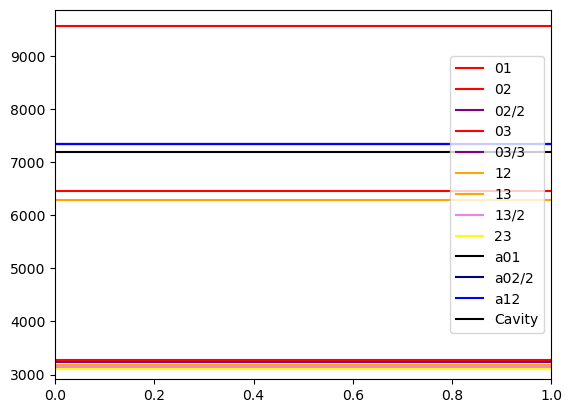

In [23]:
show(new_sX)

# Results

In [24]:
def vary_cs_ct(Cs, Ct, Ef_coef, La_coef, delta_c):
    CsV_CtV = V_Transmon(Cs-delta_c, Ct-delta_c, Ej_coef*E_j_mhz, La_coef*L_a)
    CsV_CtA = V_Transmon(Cs-delta_c, Ct+delta_c, Ej_coef*E_j_mhz, La_coef*L_a)
    CsA_CtV = V_Transmon(Cs+delta_c, Ct-delta_c, Ej_coef*E_j_mhz, La_coef*L_a)
    CsA_CtA = V_Transmon(Cs+delta_c, Ct+delta_c, Ej_coef*E_j_mhz, La_coef*L_a)
    print('check tolerance +-',delta_c*1e15,'fF')
    compare_samples(CsV_CtV=CsV_CtV, CsV_CtA=CsV_CtA, CsA_CtV=CsA_CtV, CsA_CtA=CsA_CtA)
    
def vary_ej_la(Cs, Ct, Ef_coef, La_coef, xxx):
    jV_aV = V_Transmon(Cs, Ct, 0.95*Ej_coef*E_j_mhz, 0.95*La_coef*L_a)
    jV_aA = V_Transmon(Cs, Ct, 0.95*Ej_coef*E_j_mhz, 1.05*La_coef*L_a)
    jA_aV = V_Transmon(Cs, Ct, 1.05*Ej_coef*E_j_mhz, 0.95*La_coef*L_a)
    jA_aA = V_Transmon(Cs, Ct, 1.05*Ej_coef*E_j_mhz, 1.05*La_coef*L_a)
    print('check tolerance +-5% of JJ')
    compare_samples(jV_aV=jV_aV, jV_aA=jV_aA, jA_aV=jA_aV, jA_aA=jA_aA)


In [25]:
def get_samp_abcd(abcd):
    [A,B,C,D] = abcd
    new_s = V_Transmon(A*C_s, B*C_t, C*E_j_mhz, D*L_a)
    return new_s
#########################################################

R0 = get_samp_abcd([1.0, 1.0, 1.0, 1.0])
remy_s = R0
S1 = get_samp_abcd([1.0, 1.0, 0.8, 1.0])
S2 = get_samp_abcd([0.5, 0.5, 0.2, 1.6])
S3 = get_samp_abcd([1.0, 1.0, 0.5, 0.8])
X1 = get_samp_abcd([0.949, 1.404, 0.603, 0.677])
X2 = get_samp_abcd([1.245, 0.932, 0.703, 0.906])
X3 = get_samp_abcd([1.139, 0.920, 0.490, 0.773])
X4 = get_samp_abcd([0.999, 1.270, 0.571, 0.702])    ## good, but decrease U_a please
X4n = get_samp_abcd([1, 1.3, 0.6, 0.7])             ## good, but decrease U_a please
X5 = get_samp_abcd( [0.684, 1.387, 0.420, 0.733] )
X6 = get_samp_abcd( [0.674, 2.553, 0.419, 0.443] )  ## very very good. Better than X4 (improved U_a)
X6n = get_samp_abcd( [0.7, 2.6, 0.4, 0.45] )        ## very very good. Better than X4 (improved U_a)
X7 = get_samp_abcd( [0.631, 2.679, 0.446, 0.433] )   ## freqQ is too big (5500)
X8 = get_samp_abcd( [0.713, 1.851, 0.26, 0.549] )    ## EjoEc is a bit too small
X9 = get_samp_abcd( [1.068, 2.614, 0.458, 0.429] )  ## not very good X8 is better (except EjoEc)
X10 = get_samp_abcd([0.601, 1.388, 0.16, 0.701] )  ### +frQ=3500, but EjoEx is too small

X4O1 = get_samp_abcd( [1.0, 1.27, 0.285, 0.7])   #proposed by Olivier based on X4 (decrease Ej x2)
X4O1mod = get_samp_abcd([1.148, 0.786, 0.296, 0.855]) #X4O1mod
X4O1mod1 = get_samp_abcd([1.15, 0.8, 0.3, 0.855]) #X4O1mod #best in X4O1
X4O1mod2 = get_samp_abcd([1.15, 0.8, 0.3, 0.8]) #X4O1mod
X6O1 = get_samp_abcd([0.67, 2.6, 0.2, 0.45])     #proposed by Olivier(me) based on X6 (decrease Ej x2)

X4O1mod1_Ua1 = get_samp_abcd( [1.111, 1.089, 0.302, 0.737]) ## better U_a
X4O1mod1_Ua2 = get_samp_abcd( [1.1, 1.2, 0.297, 0.53] )     ## much better U_a -> bad fr_a
X4O1mod1_Ua3 = get_samp_abcd( [1.1, 1.444, 0.297, 0.594] )  ## Good compromise
X4O1mod1_Ua4 = get_samp_abcd( [1.104, 1.85, 0.298, 0.503] )  ## U_a=2!, but g_zz suffer
X4O1mod1_Ua5 = get_samp_abcd( [1.062, 1.371, 0.293, 0.622] ) # Compromise
X4O1mod1_Ua6 = get_samp_abcd( [1.062, 1.486, 0.293, 0.655] ) # Compromise, AND lower fr_A ### U6 - same name

###___BEST_SAMPLES__:
S3 = get_samp_abcd([1.0, 1.0, 0.5, 0.8])
X4n = get_samp_abcd([1, 1.3, 0.6, 0.7])             ## good, but decrease U_a please
X6n = get_samp_abcd( [0.7, 2.6, 0.4, 0.45] )        ## very very good. Better than X4 (improved U_a)
X4O1mod1 = get_samp_abcd([1.15, 0.8, 0.3, 0.855]) #X4O1mod #best in X4O1

###__U6___Seria_####
U6 = get_samp_abcd( [1.062, 1.486, 0.293, 0.655] ) # Low U_a, quite low fr_a, ok g_zz
U6n = get_samp_abcd( [1.0, 1.5, 0.28, 0.66] ) # [C_s, C_t, Ej_sensitive, L_a ]
U6n_Ct130 = V_Transmon(110e-15, 130.0e-15, 0.25*E_j_mhz, 0.5*L_a)
Ux   = V_Transmon(125e-15, 123e-15, 0.25*E_j_mhz, 0.5*L_a)



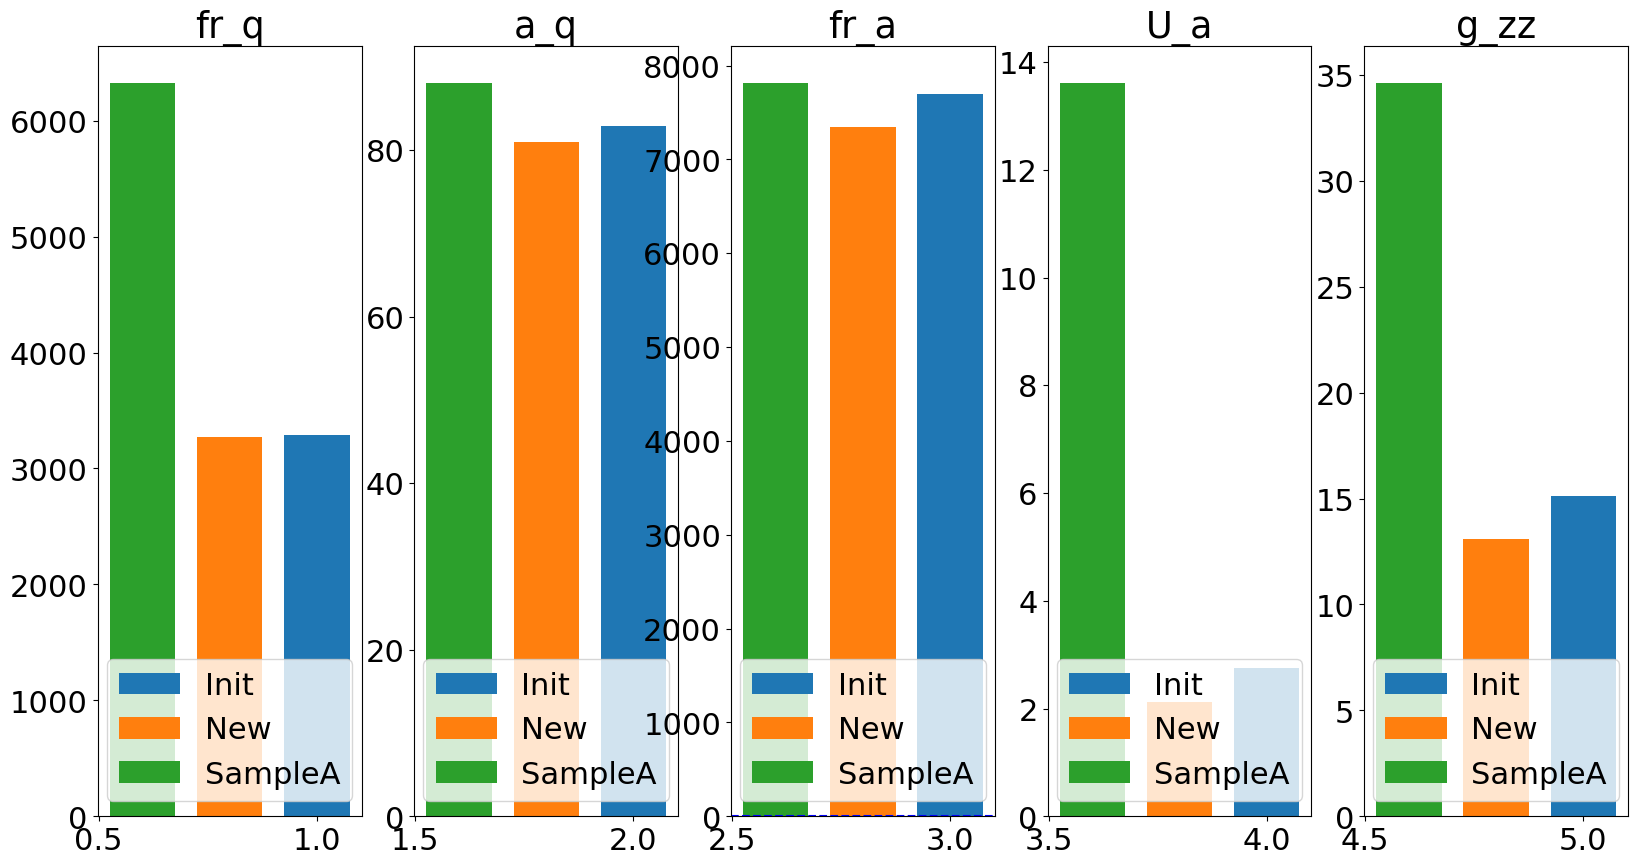

In [26]:
fig = compare_samples_my(New=new_sX, Init=init_s, SampleA=remy_s)


____

## Chosen parameters

In [27]:
target = Ux

### Print target parameters

In [28]:
print('target Ej:', Joul_to_MHz(target.E_j), '[MHz]')
print('target Cs:', 1e15*target.C_s, '[fF]')
print('target Ct:', 1e15*target.C_t, '[fF]')
print('target La:', round(1e9*target.L_a,3), '[nH]')

target Ej: 7300.0 [MHz]
target Cs: 125.0 [fF]
target Ct: 123.0 [fF]
target La: 2.66 [nH]


f01   2930.802811087332
f12   2853.3218951427693
f23   2775.8409791982076
f02/2 2892.062353115051
f13/2 2814.5814371704882
f03/3 2853.32189514277
a01   7373.104134226878
a12   7371.640503897359
a02/2 7372.372319062119
f02 5784.124706230102
f13 5629.1628743409765
f03 8559.96568542831


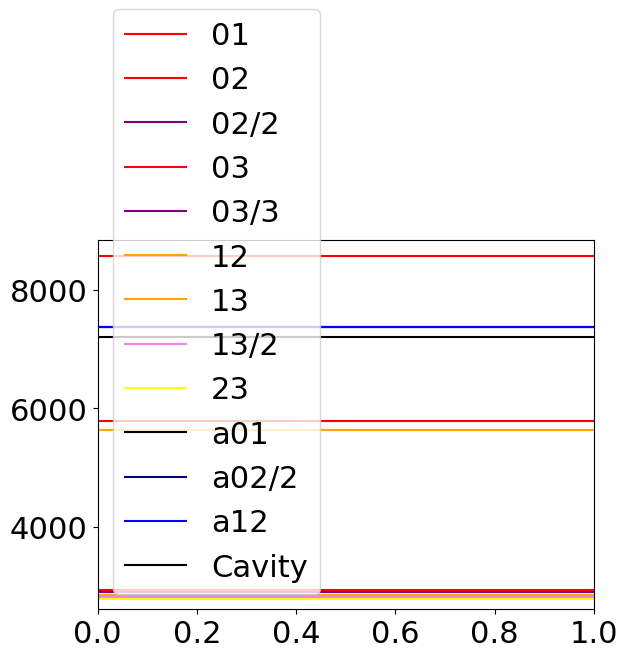

In [29]:
plot_spectra(target)

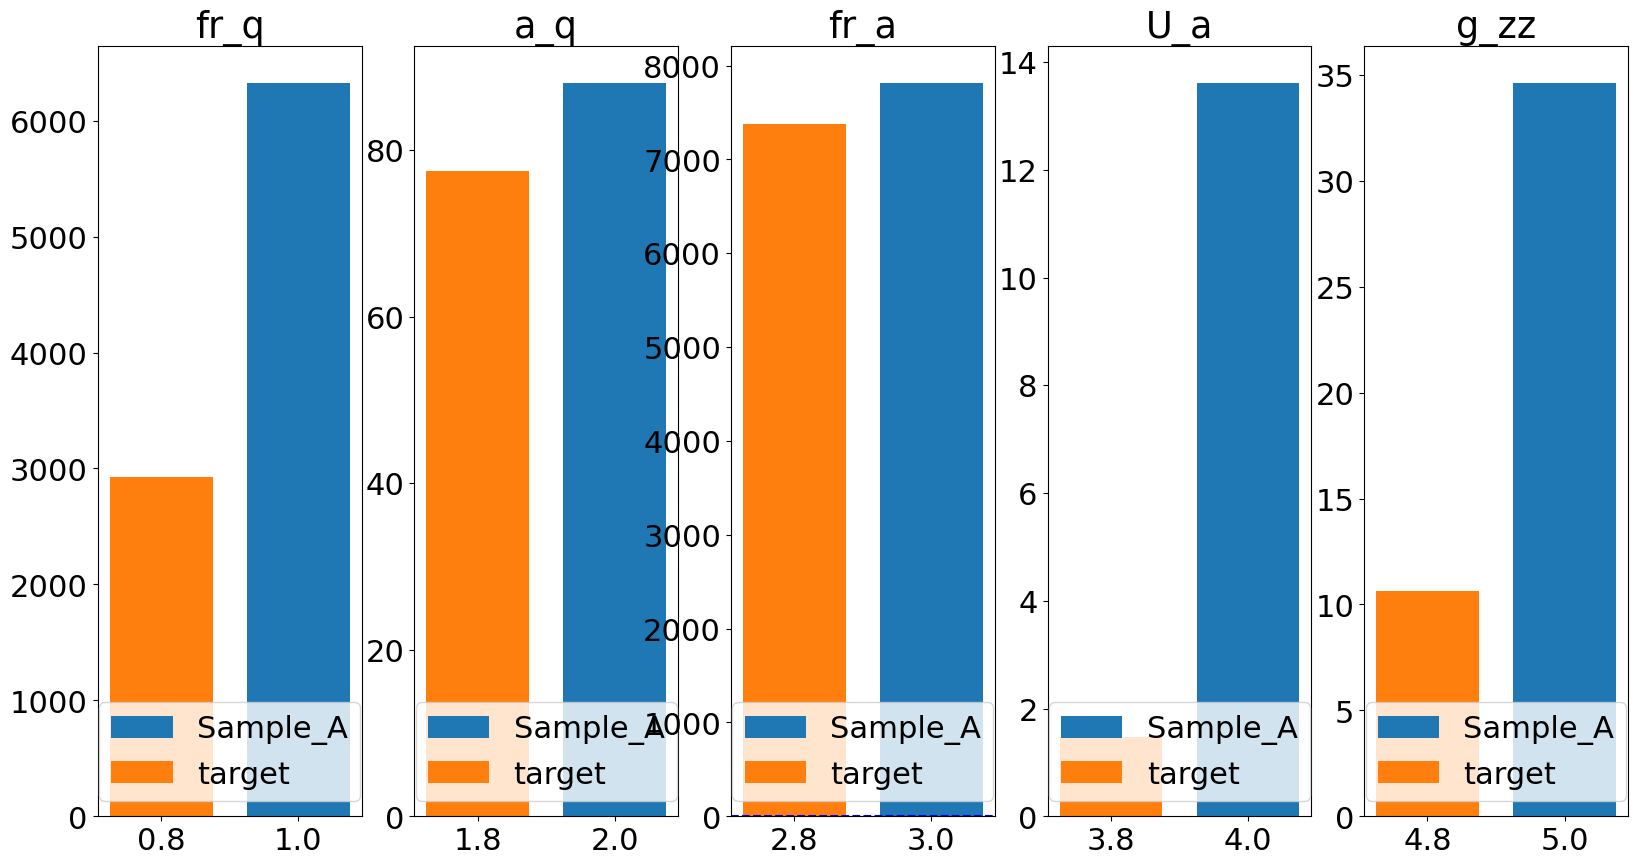

In [30]:
Sample_A = remy_s
fig = compare_samples_my(target=target, Sample_A=Sample_A)
